In [1]:
import pandas as pd
import numpy as np

import gower
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# To make the code reproducable
np.random.seed(42)

In [3]:
def Chart3D (cat_column):
    


    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(projection='3d')


    for s in df[cat_column].unique():
        ax.scatter(df[df[cat_column]==s]['RECENCY'], df[df[cat_column]==s]['FREQUENCY'], df[df[cat_column]==s]['MONETARY'],  label=f'{s}')
    ax.set_xlabel('RECENCY')
    ax.set_ylabel('FREQUENCY')
    ax.set_zlabel('MONETARY')
    ax.legend(loc='upper right')

    plt.show()
#
def PieChart(cat_column):
    # Set Seaborn style
    sns.set(style="whitegrid")

    # Prepare data
    segment_counts = df[cat_column].value_counts()

    # Plot
    fig, ax = plt.subplots()
    ax.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title('Customer Segmentation')
    plt.show()
#
def SummaryStats(cat_column):
    
    summary_stats_df = pd.DataFrame()

    for segment in df[cat_column].unique():
        segment_data = df[df[cat_column] == segment]

        # Summary for numerical features
        num_summary = segment_data[numerical_features].agg(['mean', 'std', 'min', 'max', 'count']).unstack()
        
        # Summary for categorical features
        cat_mode = segment_data[categorical_features].apply(lambda x: x.mode()[0])  # Mode
        cat_freq = segment_data[categorical_features].apply(lambda x: x.nunique()) 

        cat_mode.index = [f"{feat}_mode" for feat in categorical_features]
        cat_freq.index = [f"{feat}_freq" for feat in categorical_features]

        # Combining the summaries for both types of variables
        segment_summary = pd.concat([num_summary, cat_mode, cat_freq])

        # Adding the segment summary to the overall summary
        summary_stats_df = pd.concat([summary_stats_df, segment_summary], axis=1)

    # Naming the columns after the segments
    summary_stats_df.columns = [f"Segment_{seg}" for seg in df[cat_column].unique()]
    
    return summary_stats_df

In [4]:
df = pd.read_csv('./RFM_DEMOG_data.csv')
df.head()

,C_CUSTOMER_SK,C_PREFERRED_CUST_FLAG,AGE,GENDER,MARITAL_STATUS,EDUCATION_STATUS,PURCHASE_ESTIMATE,CREDIT_RATING,DEP_COUNT,DEP_EMPLOYED_COUNT,DEP_COLLEGE_COUNT,RECENCY,MONETARY,FREQUENCY
0,54330771,Y,60,M,U,2 yr Degree,3500,Unknown,5,5,4,164,970472.98,35
1,21304212,N,47,F,D,Advanced Degree,9000,High Risk,4,4,0,3,726205.33,41
2,33990331,N,78,F,U,Unknown,3000,Good,5,3,5,114,1012901.47,37
3,89986389,N,51,F,S,4 yr Degree,3000,Good,5,0,4,55,946833.36,35
4,89263527,N,66,M,U,Advanced Degree,6500,Unknown,3,2,3,18,702620.25,36


In [5]:
len(df)

5243

In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

5198

In [8]:
df.columns

Index(['C_CUSTOMER_SK', 'C_PREFERRED_CUST_FLAG', 'AGE', 'GENDER',
       'MARITAL_STATUS', 'EDUCATION_STATUS', 'PURCHASE_ESTIMATE',
       'CREDIT_RATING', 'DEP_COUNT', 'DEP_EMPLOYED_COUNT', 'DEP_COLLEGE_COUNT',
       'RECENCY', 'MONETARY', 'FREQUENCY'],
      dtype='object')

In [9]:
categorical_features=['GENDER','MARITAL_STATUS', 'CREDIT_RATING']
numerical_features=['RECENCY', 'MONETARY', 'FREQUENCY']

## Data Exploration

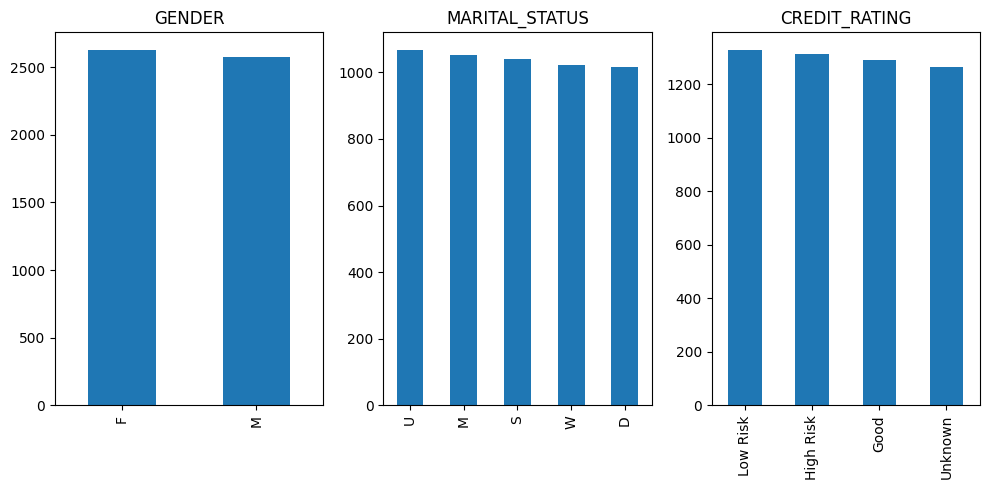

In [10]:
# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Iterate through categorical columns and plot bar charts
for i, c in enumerate(categorical_features):
    df[c].value_counts().plot(kind='bar',ax=axes[i])
    axes[i].set_title(c)
plt.subplots_adjust(hspace=2)
plt.tight_layout()
plt.show()

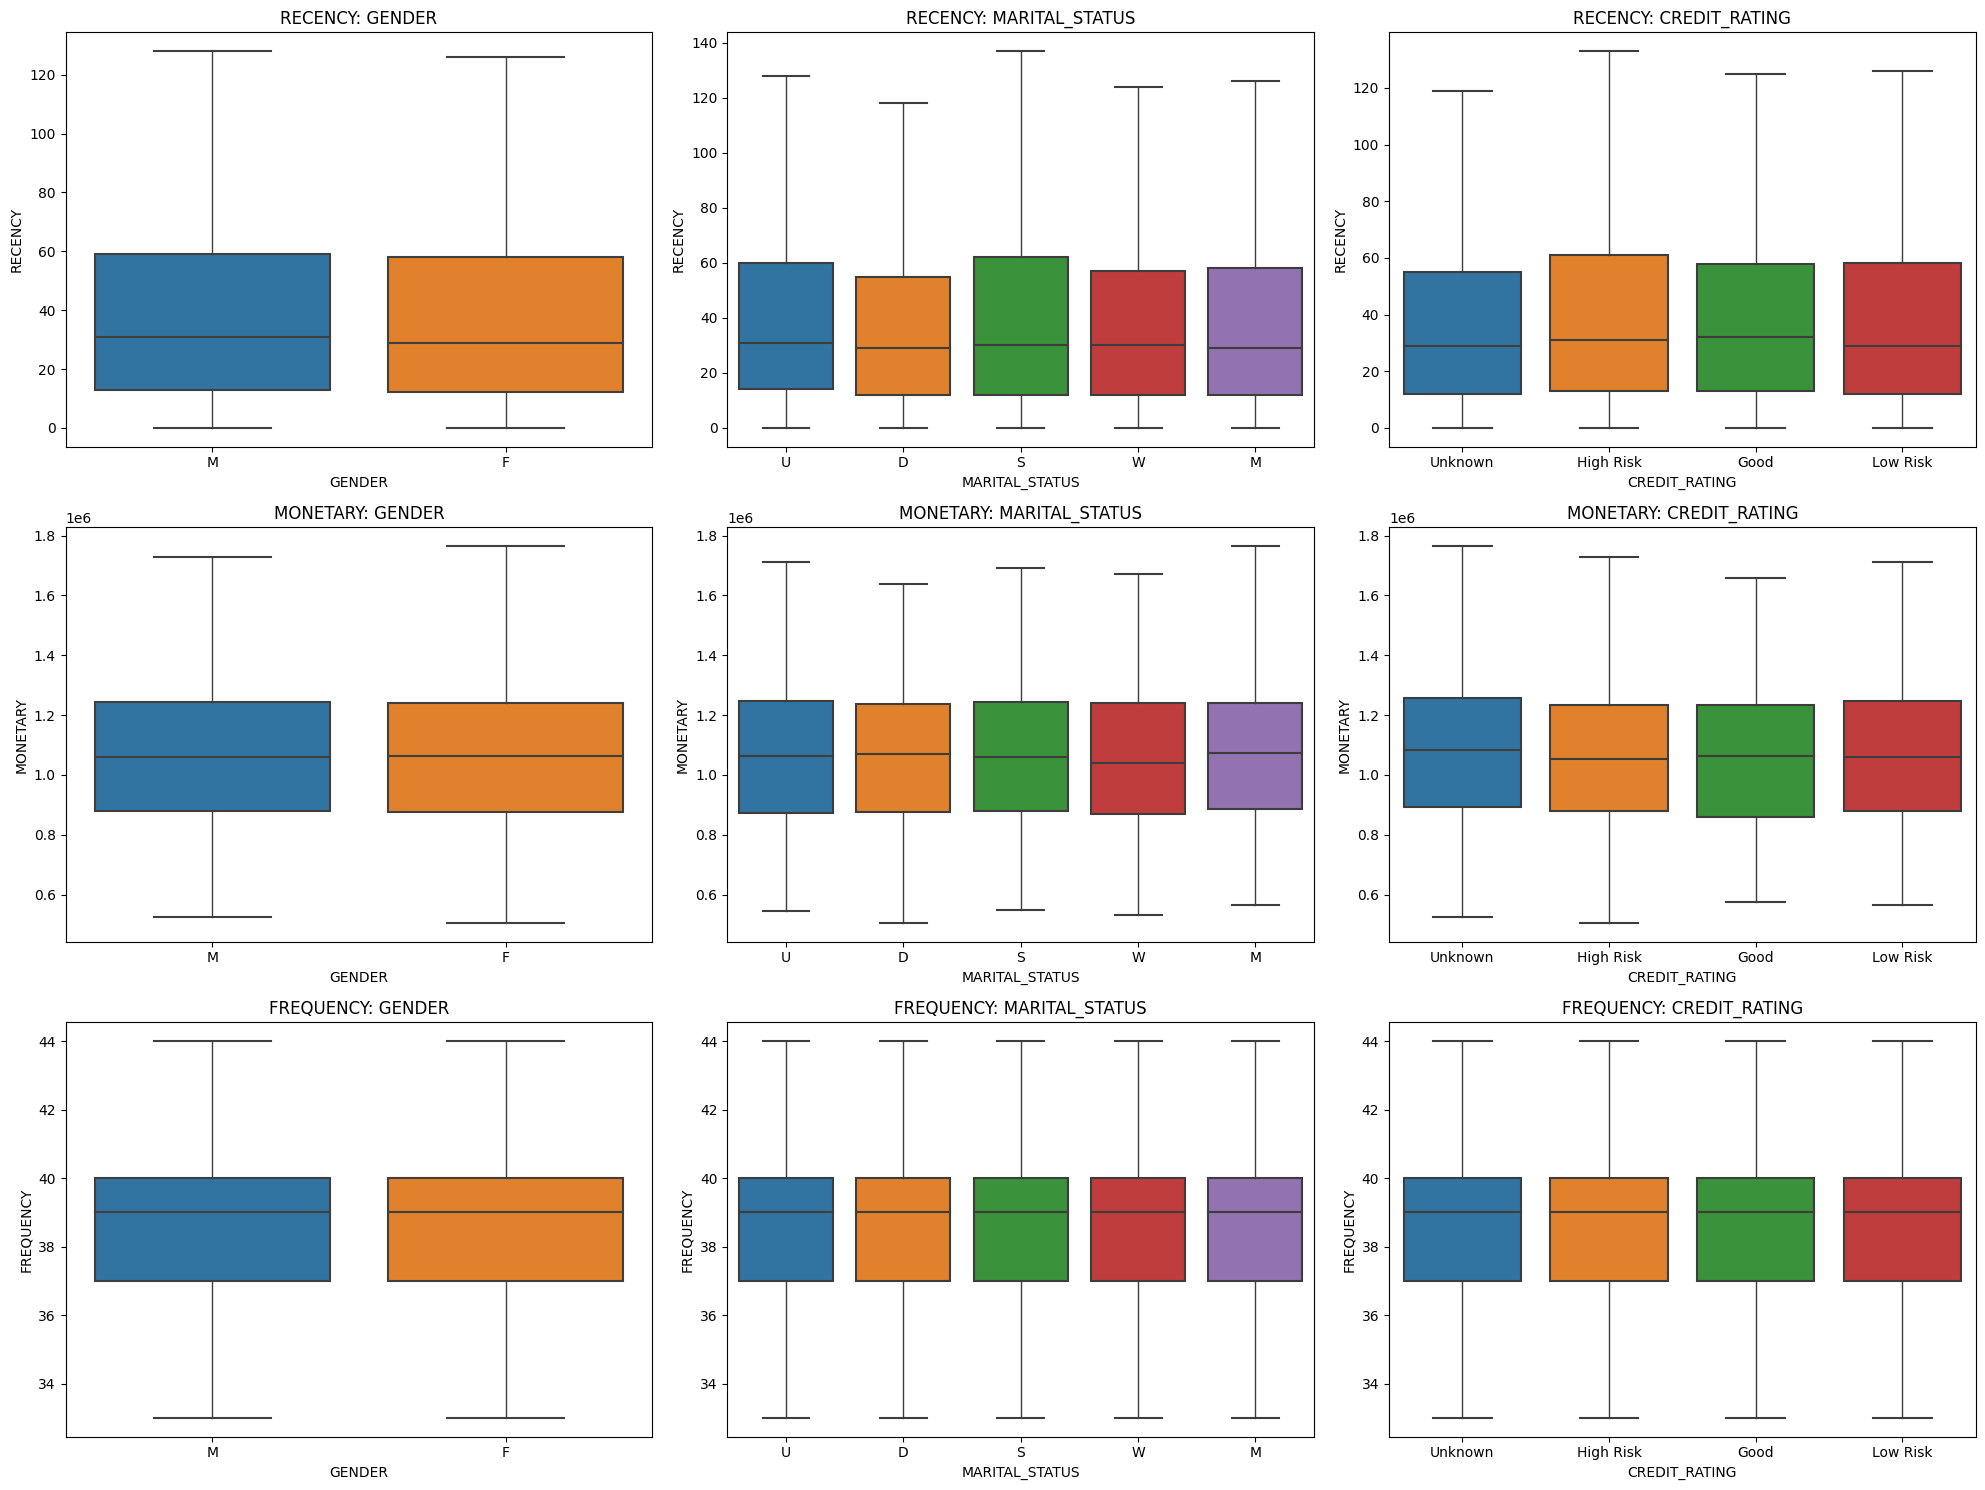

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Iterate through categorical columns and plot bar charts
for j, cn in enumerate(numerical_features):
    for i, cc in enumerate(categorical_features):
        row = j
        col = i    
        sns.boxplot(x = cc, y =  cn, data=df, showfliers=False, showcaps=True, whiskerprops={'linewidth': 1},  ax=axes[row, col])
        axes[row, col].set_title(f'{cn}: {cc}')
plt.subplots_adjust(hspace=2)
plt.tight_layout()
plt.show()

The data are syntetic and there are no visible groups, there always approximate the same number of records in each group.
Let's do data more uneven.

In [12]:
#increase montery by 5 for married, women with low risk
df['MONETARY'] = np.where(((df['GENDER']=='F') & (df['MARITAL_STATUS']=='M') & (df['CREDIT_RATING']=='Low Risk')), df['MONETARY']*15, df['MONETARY'])

#increase montery by 10 for Single, man with low risk
df['MONETARY'] = np.where(((df['GENDER']=='M') & (df['MARITAL_STATUS']=='S') & (df['CREDIT_RATING']=='Low Risk')), df['MONETARY']*5, df['MONETARY'])

#decrease frequency by 2 for single, women with high risk
df['FREQUENCY'] = np.where(((df['GENDER']=='F') & (df['MARITAL_STATUS']=='S') & (df['CREDIT_RATING']=='High Risk')), df['FREQUENCY']/2, df['FREQUENCY'])

#decrease frequency by 4 for Single, man with low risk
df['FREQUENCY'] = np.where(((df['GENDER']=='M') & (df['MARITAL_STATUS']=='S') & (df['CREDIT_RATING']=='High Risk')), df['FREQUENCY']/4, df['FREQUENCY'])

#decrease recency for Divorce both

df['RECENCY'] = np.where((df['MARITAL_STATUS']=='D'), df['RECENCY']/5, df['RECENCY'])

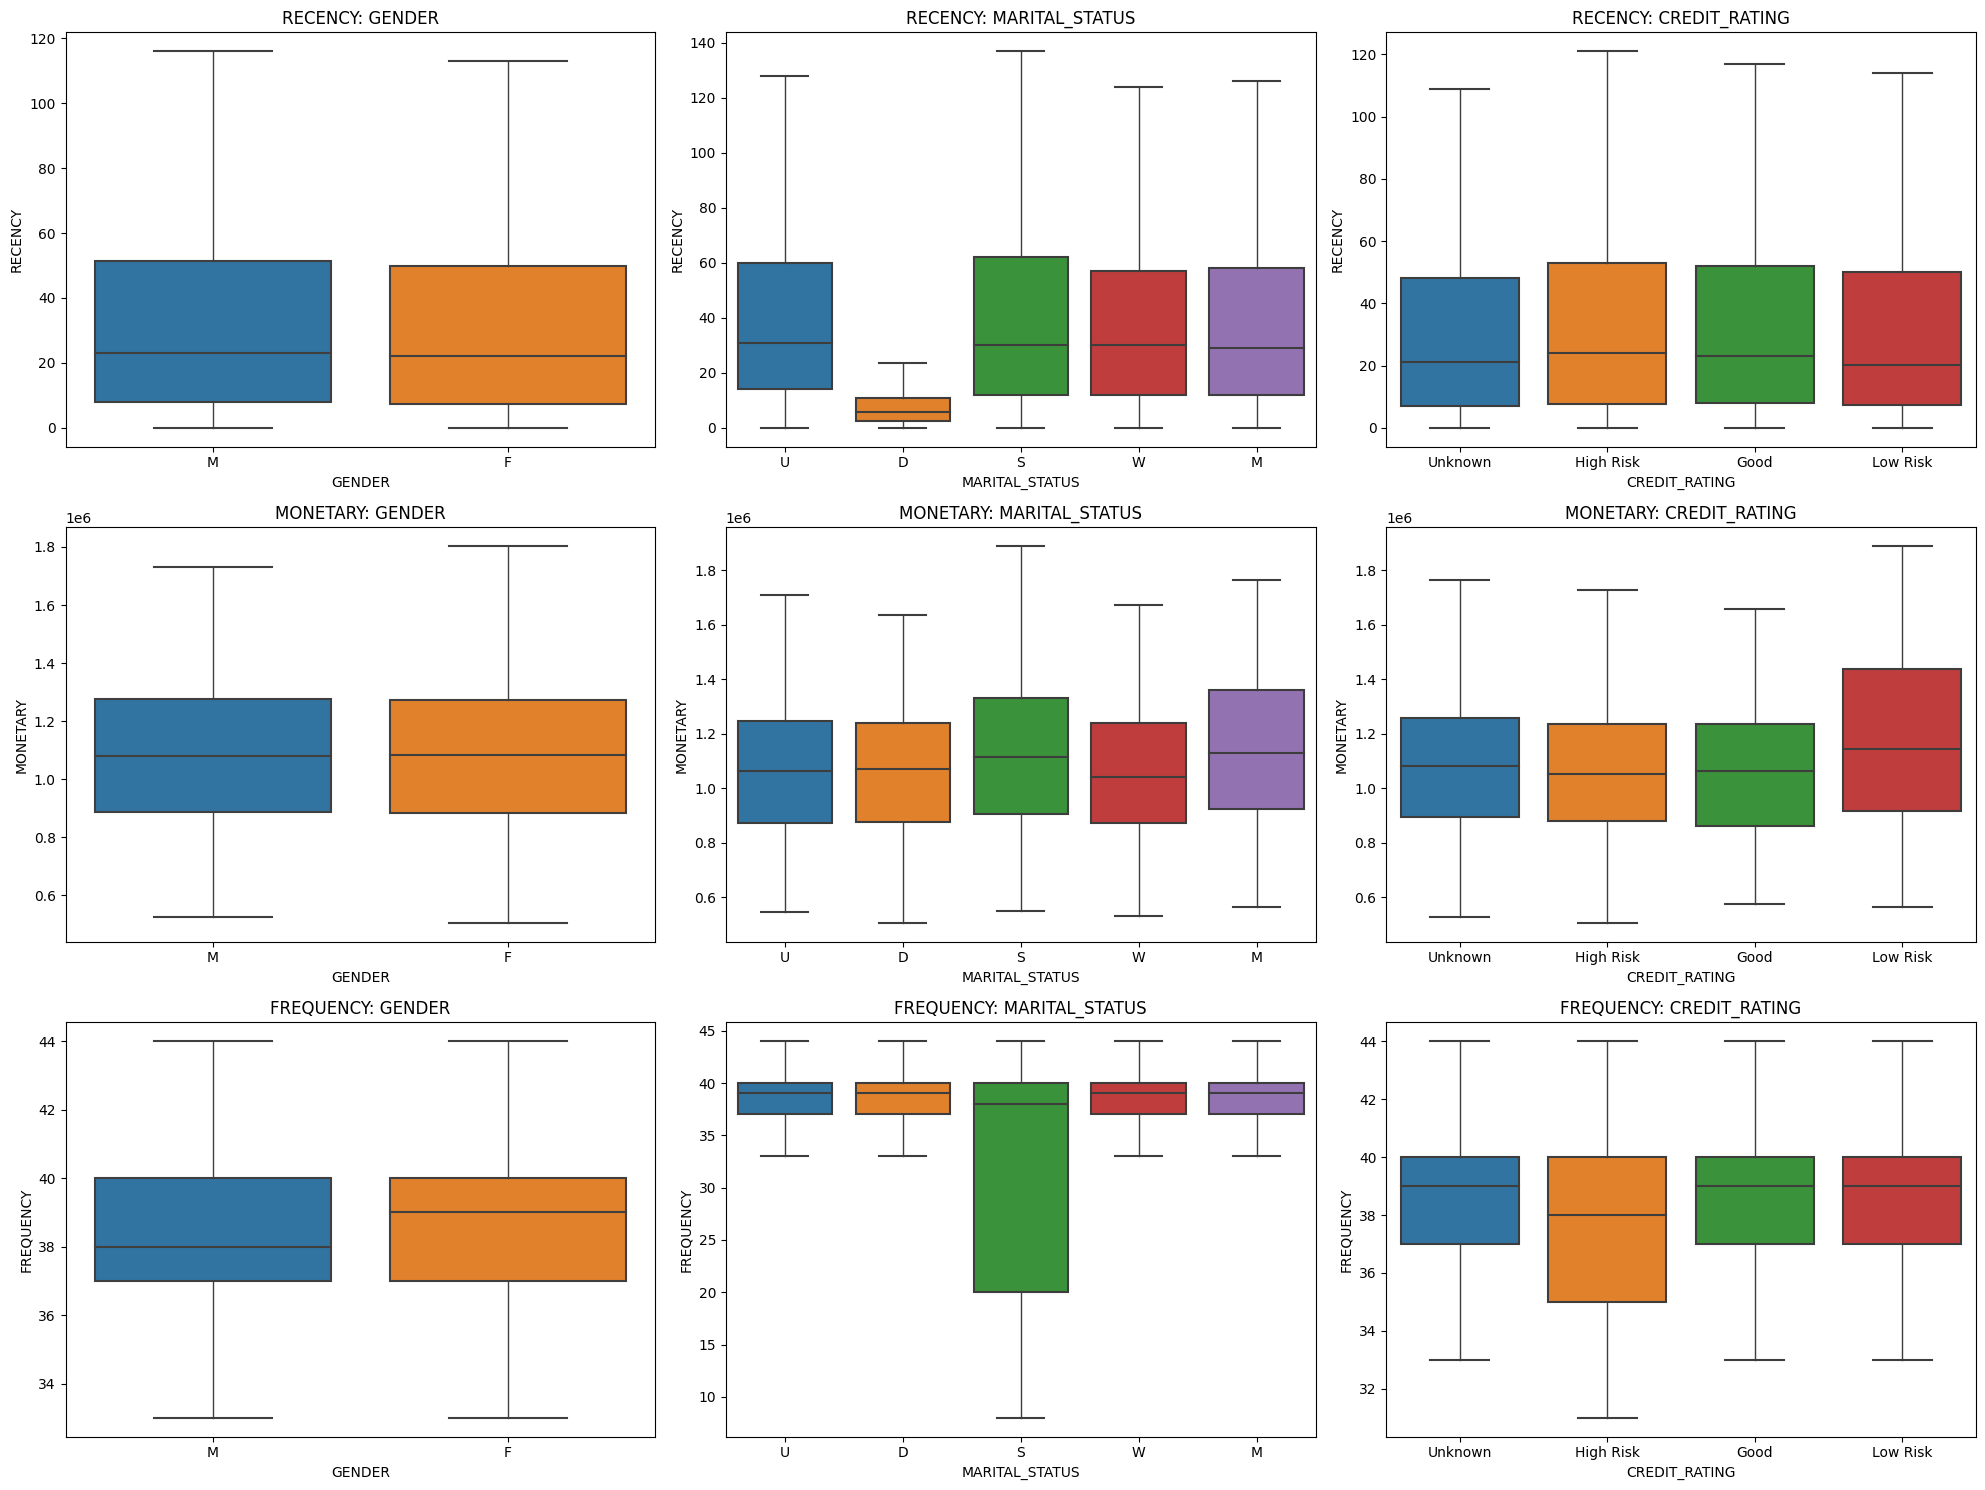

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Iterate through categorical columns and plot bar charts
for j, cn in enumerate(numerical_features):
    for i, cc in enumerate(categorical_features):
        row = j
        col = i    
        sns.boxplot(x = cc, y =  cn, data=df, showfliers=False, showcaps=True, whiskerprops={'linewidth': 1},  ax=axes[row, col])
        axes[row, col].set_title(f'{cn}: {cc}')
plt.subplots_adjust(hspace=2)
plt.tight_layout()
plt.show()

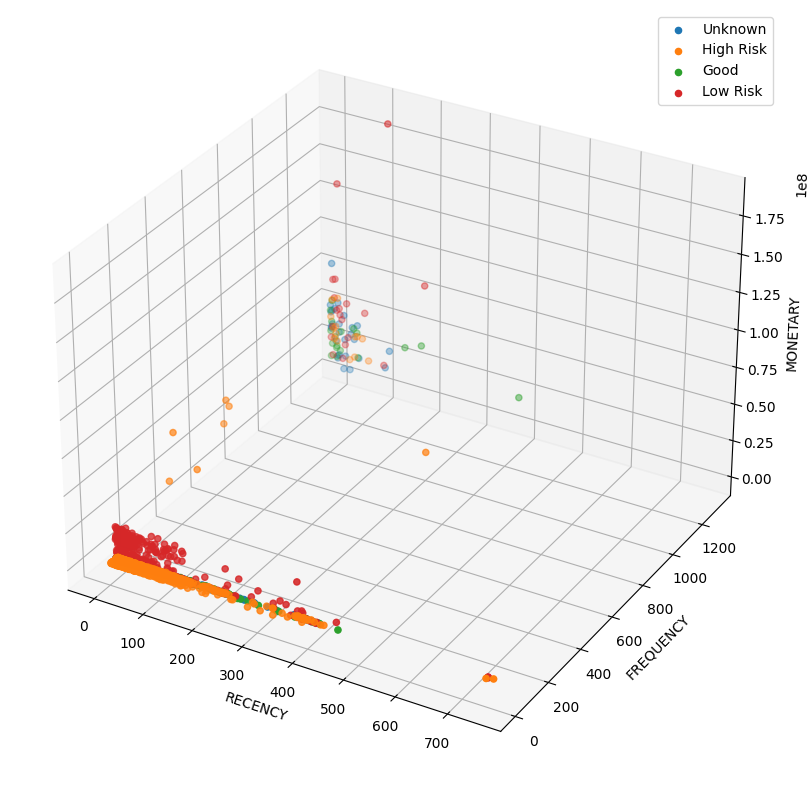

In [14]:
Chart3D ('CREDIT_RATING')

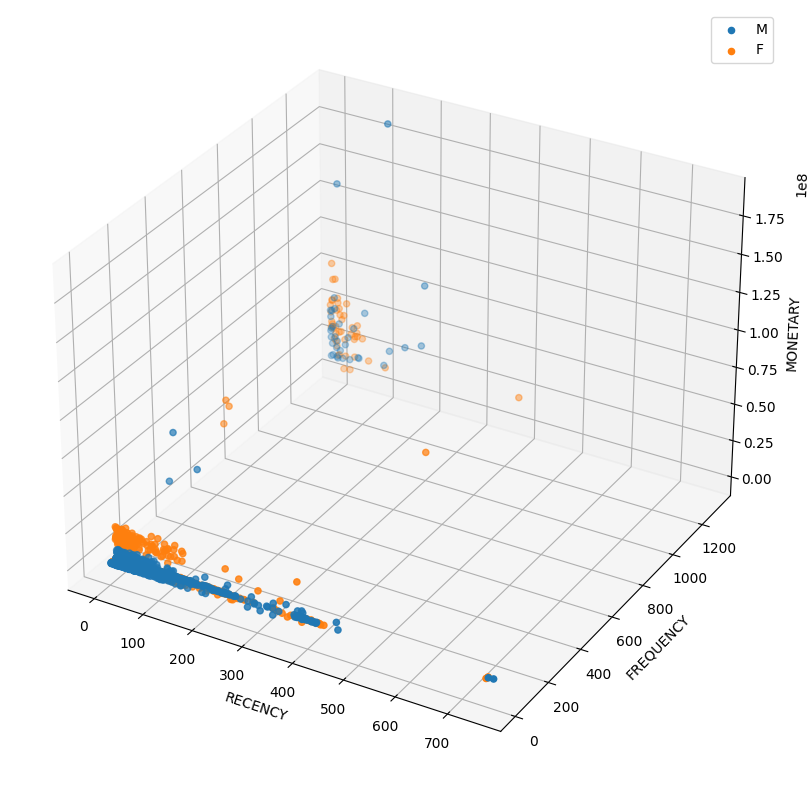

In [15]:
Chart3D ('GENDER')

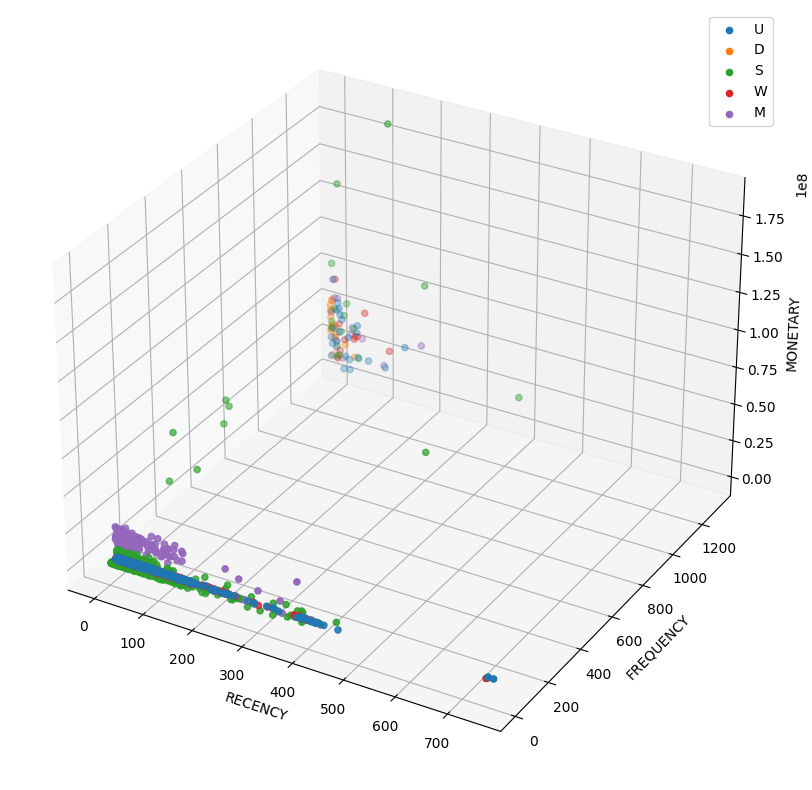

In [16]:
Chart3D ('MARITAL_STATUS')

In [17]:
features = categorical_features + numerical_features

In [18]:
distance_matrix=gower.gower_matrix(np.asarray(df[features]))

In [19]:
model = AgglomerativeClustering(n_clusters=5, linkage='average', affinity='precomputed')
segments = model.fit_predict(distance_matrix)
df['SEGMENT_AVERAGE'] = segments
print(silhouette_score(distance_matrix, segments, metric="precomputed"))

0.29011708


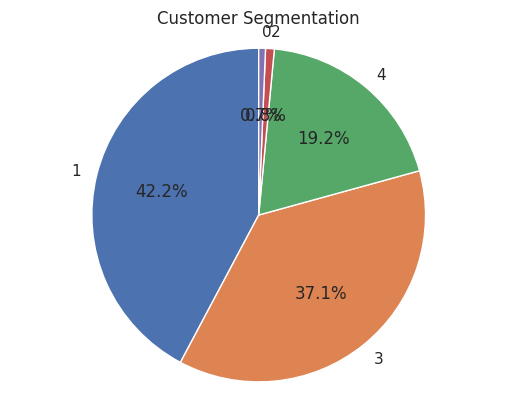

In [20]:
PieChart('SEGMENT_AVERAGE')

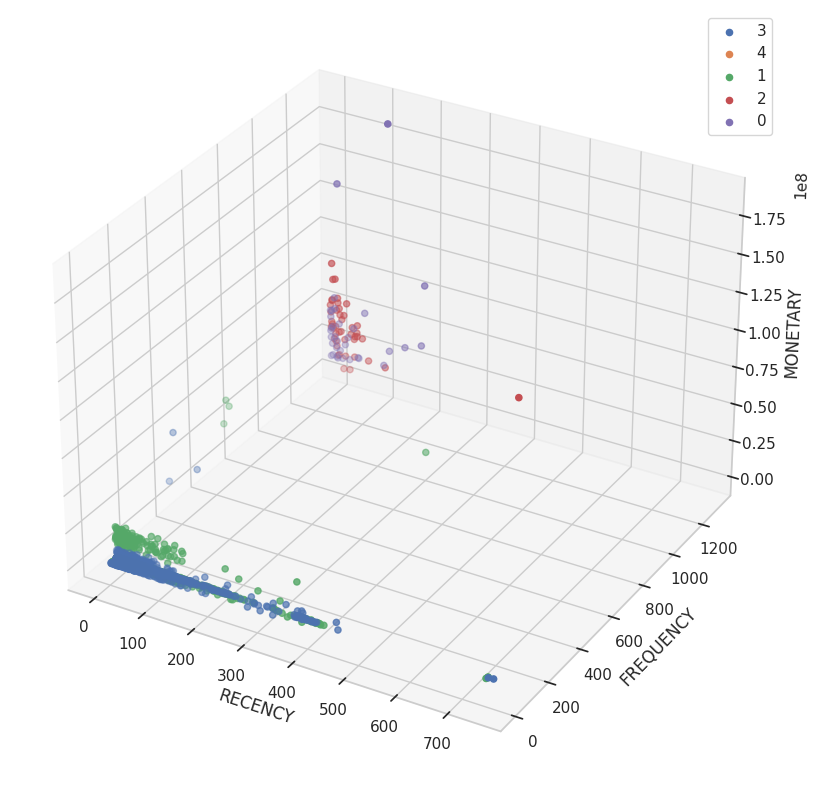

In [21]:
Chart3D ('SEGMENT_AVERAGE')

In [22]:
SummaryStats('SEGMENT_AVERAGE')

,Segment_3,Segment_4,Segment_1,Segment_2,Segment_0
"(RECENCY, mean)",50.786604,10.176376,50.124374,34.668182,42.111765
"(RECENCY, std)",68.758842,14.749046,68.866407,60.881203,56.853884
"(RECENCY, min)",0.0,0.0,0.0,0.2,0.0
"(RECENCY, max)",746.0,155.2,736.0,396.0,200.0
"(RECENCY, count)",1926.0,999.0,2195.0,44.0,34.0
"(MONETARY, mean)",1372207.857243,1058530.422613,2088537.760269,38994831.467955,41132762.524118
"(MONETARY, std)",1950443.656449,228498.720942,4208856.246275,15860653.814395,34414866.459708
"(MONETARY, min)",530415.5,505194.95,543873.69,10006965.86,16684652.71
"(MONETARY, max)",58751824.2,1636798.93,52991223.87,81276058.97,186129053.4
"(MONETARY, count)",1926.0,999.0,2195.0,44.0,34.0


In [23]:
model = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='precomputed')
segments = model.fit_predict(distance_matrix)
df['SEGMENT_COMPLETE'] = segments
print(silhouette_score(distance_matrix, segments, metric="precomputed"))

0.11573678


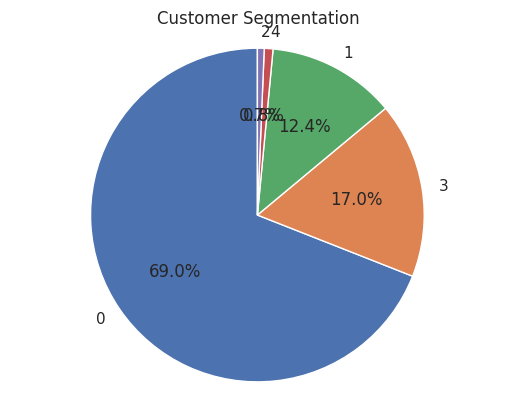

In [24]:
PieChart('SEGMENT_COMPLETE')

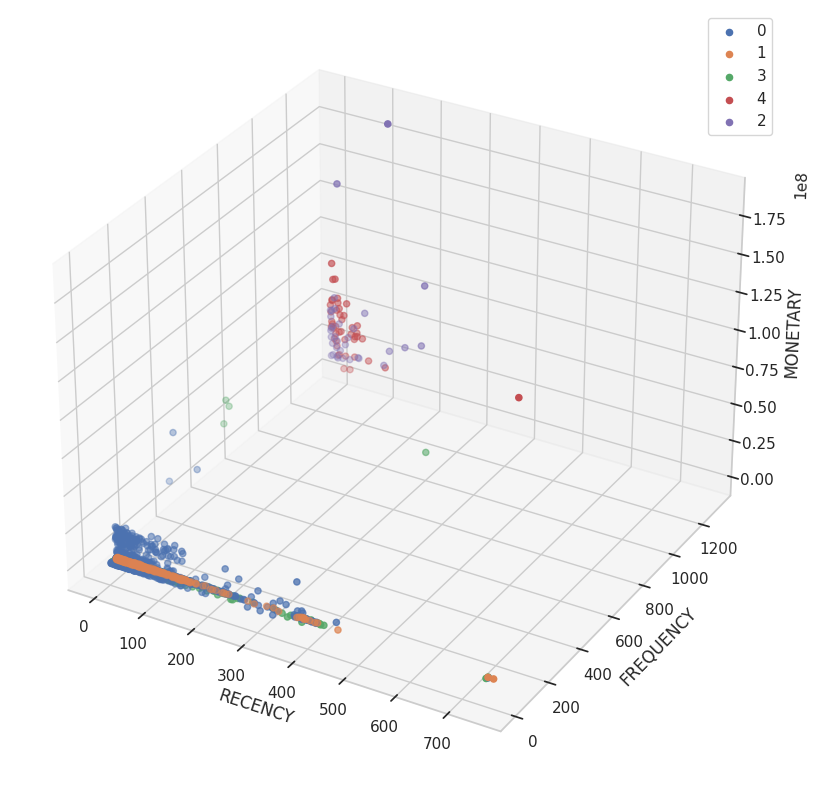

In [25]:
Chart3D ('SEGMENT_COMPLETE')

In [26]:
SummaryStats('SEGMENT_COMPLETE')

,Segment_0,Segment_1,Segment_3,Segment_4,Segment_2
"(RECENCY, mean)",37.674805,52.251932,55.389831,34.668182,42.111765
"(RECENCY, std)",57.464794,74.785554,77.260889,60.881203,56.853884
"(RECENCY, min)",0.0,0.0,0.0,0.2,0.0
"(RECENCY, max)",737.0,746.0,736.0,396.0,200.0
"(RECENCY, count)",3588.0,647.0,885.0,44.0,34.0
"(MONETARY, mean)",1807886.861982,1069936.593709,1249420.985435,38994831.467955,41132762.524118
"(MONETARY, std)",3294119.538534,228947.041084,2961803.195579,15860653.814395,34414866.459708
"(MONETARY, min)",505194.95,543873.69,578281.06,10006965.86,16684652.71
"(MONETARY, max)",58751824.2,1710607.99,52991223.87,81276058.97,186129053.4
"(MONETARY, count)",3588.0,647.0,885.0,44.0,34.0


In [27]:
df.groupby(['SEGMENT_AVERAGE','SEGMENT_COMPLETE']).size()

SEGMENT_AVERAGE  SEGMENT_COMPLETE
0                2                     34
1                0                    920
                 1                    390
                 3                    885
2                4                     44
3                0                   1669
                 1                    257
4                0                    999
dtype: int64

In [28]:
dbscan_cluster = DBSCAN(eps=0.01, 
                        min_samples=100, 
                        metric="precomputed")
dbscan_cluster.fit(distance_matrix)
segments = dbscan_cluster.labels_.tolist()
df['SEGMENT_DBSCAN'] = segments
print(silhouette_score(distance_matrix, segments, metric="precomputed"))

0.56399065


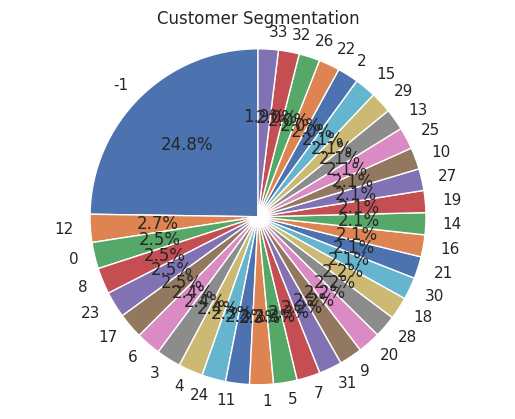

In [29]:
PieChart('SEGMENT_DBSCAN')

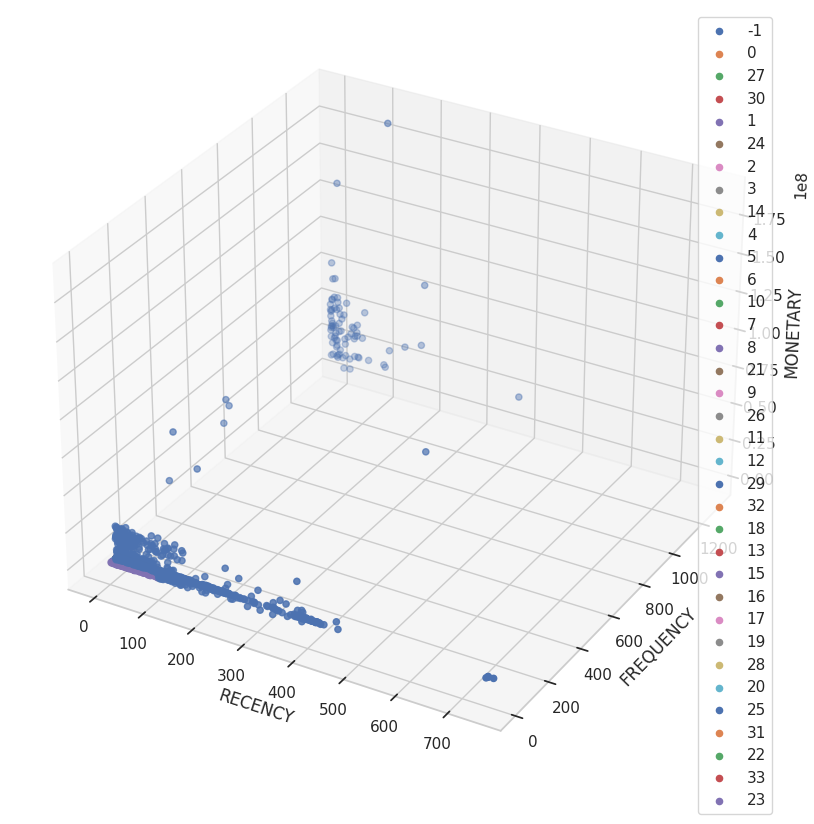

In [30]:
Chart3D ('SEGMENT_DBSCAN')

In [31]:
SummaryStats('SEGMENT_DBSCAN')

,Segment_-1,Segment_0,Segment_27,Segment_30,Segment_1,Segment_24,Segment_2,Segment_3,Segment_14,Segment_4,...,Segment_16,Segment_17,Segment_19,Segment_28,Segment_20,Segment_25,Segment_31,Segment_22,Segment_33,Segment_23
"(RECENCY, mean)",98.152758,11.293939,32.697248,29.567568,8.235294,32.705882,27.0,27.894309,27.3,31.422764,...,32.009091,10.178125,27.690909,6.95,28.716814,25.330275,31.104348,28.72381,25.910891,28.709924
"(RECENCY, std)",104.612338,15.24488,24.831471,24.051695,10.045174,23.940729,22.57594,22.553693,21.000896,24.680917,...,22.643425,14.043358,20.818898,7.619345,23.230395,23.345257,22.985645,21.862549,20.576248,21.962727
"(RECENCY, min)",0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(RECENCY, max)",746.0,81.2,86.0,87.0,58.6,93.0,80.0,88.0,89.0,97.0,...,88.0,74.4,84.0,58.2,85.0,85.0,89.0,86.0,78.0,95.0
"(RECENCY, count)",1287.0,132.0,109.0,111.0,119.0,119.0,105.0,123.0,110.0,123.0,...,110.0,128.0,110.0,112.0,113.0,109.0,115.0,105.0,101.0,131.0
"(MONETARY, mean)",5634165.262533,1040230.193788,1027377.414954,1059612.867838,1057478.669496,1058406.663277,1028629.286952,1082401.779187,1062324.720364,1100350.529837,...,1085027.510273,1068033.225313,1060332.920455,1116493.612679,1073796.522832,1026981.731835,1052099.218609,1054904.321714,1026772.099703,1058549.357023
"(MONETARY, std)",12136882.057211,239007.001219,225723.44045,232168.947176,231473.514478,230363.77812,242896.100435,216182.369935,247989.650619,219998.544846,...,251596.072883,220581.568834,218052.376781,251761.388979,258979.983822,209821.077115,230428.45042,232938.737309,214547.868208,209483.468386
"(MONETARY, min)",530415.5,505194.95,620103.71,572683.52,525506.19,590989.85,592160.89,595959.44,621769.19,703670.31,...,666113.6,600211.89,624608.1,612471.54,615054.84,589138.96,574131.46,579772.05,578281.06,549510.38
"(MONETARY, max)",186129053.4,1579378.07,1520513.84,1471269.54,1541680.54,1635212.47,1546594.86,1571193.17,1549843.85,1710607.99,...,1643909.87,1582602.28,1504600.56,1612906.97,1671208.72,1449364.01,1618587.47,1568329.78,1586708.2,1457186.08
"(MONETARY, count)",1287.0,132.0,109.0,111.0,119.0,119.0,105.0,123.0,110.0,123.0,...,110.0,128.0,110.0,112.0,113.0,109.0,115.0,105.0,101.0,131.0


DBSCAN tries to create as many clusters as there are combinations of values in categorical columns. If there are manageable number of segments (both Clustering methods), there are always 1 large, and 1 or few tiny-tiny. The Silhouette score is higher in teh cases where more segments and "smaller" the lagest one.